In [3]:
train_dir = r"C:\Users\shres\Downloads\Skillcarft Tasks\SCT_ML_03\Task-3 DATASET CAT DOG\training_set\training_set"
test_dir = r"C:\Users\shres\Downloads\Skillcarft Tasks\SCT_ML_03\Task-3 DATASET CAT DOG\test_set\test_set"

--- Starting SVM Cat/Dog Image Classifier ---

--- Phase 1: Data Loading and Preprocessing ---
Loading training dataset for SVM...
Loading cats images from: C:\Users\shres\Downloads\Skillcarft Tasks\SCT_ML_03\Task-3 DATASET CAT DOG\training_set\training_set\cats...
  Loaded 4000 cats images.
Loading dogs images from: C:\Users\shres\Downloads\Skillcarft Tasks\SCT_ML_03\Task-3 DATASET CAT DOG\training_set\training_set\dogs...
  Loaded 865 dogs images.
Finished loading images from C:\Users\shres\Downloads\Skillcarft Tasks\SCT_ML_03\Task-3 DATASET CAT DOG\training_set\training_set. Total images loaded: 4865
Raw image feature shape (flattened): (4865, 4096) (Each image is 4096 pixels)
Training data shape: (3892, 4096)
Validation data shape: (973, 4096)

Standardizing pixel values (scaling data)...
Data scaled successfully.

--- Phase 2: Building and Training the SVM Model ---
Initializing SVM Model (SVC with RBF kernel)...

Starting SVM Model training. This might take significant time depen

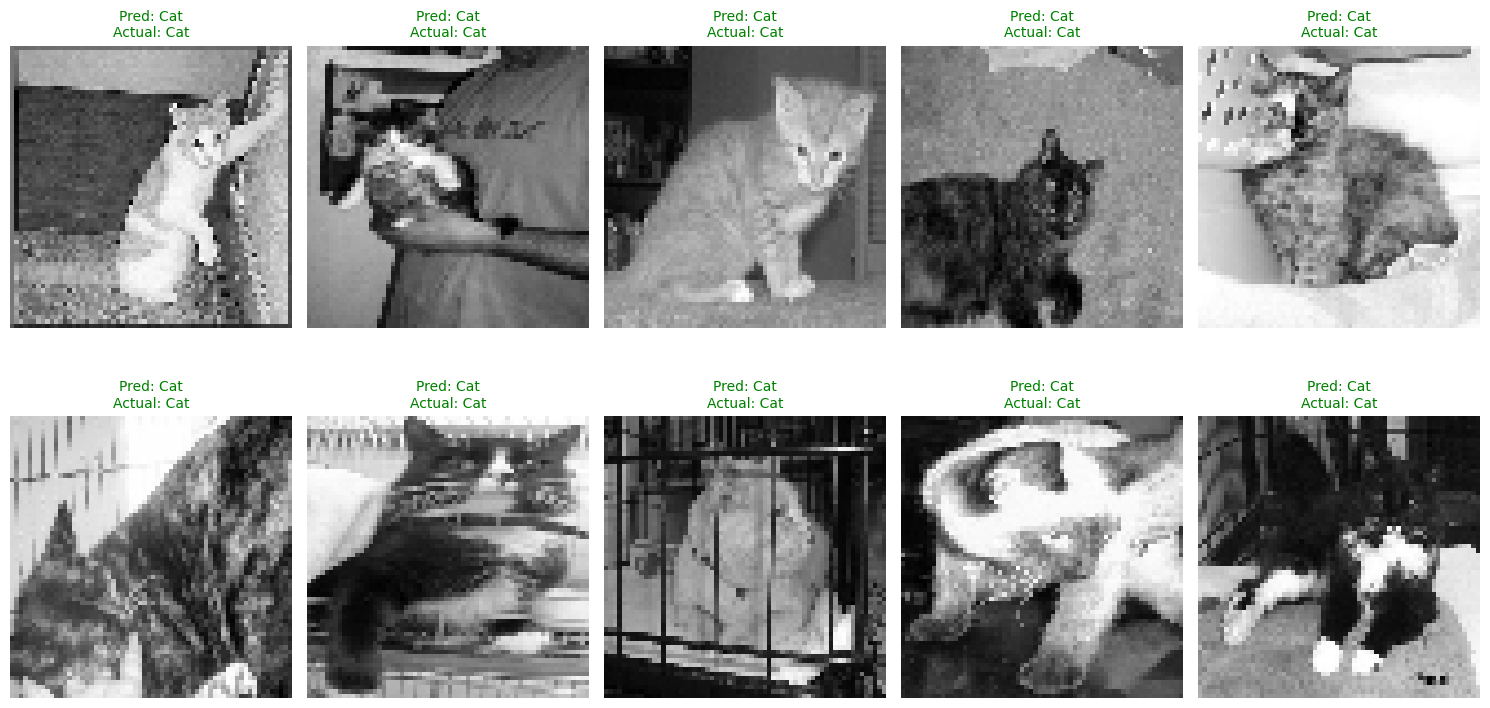


--- Script Finished Successfully ---


In [4]:
# ================================================================
# Cat and Dog Image Classifier using Support Vector Machine (SVM)
# (Final Version for 'catdog_svm_env' with All Requested Visualizations)
# ================================================================

# %matplotlib inline # Uncomment this line if running in Jupyter for plots to show directly in the notebook

# ✅ Import Libraries
import os
import cv2 # OpenCV for image loading and processing
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For plotting and visualizations
from sklearn.model_selection import train_test_split # For splitting data
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # For model evaluation
from sklearn.preprocessing import StandardScaler # For scaling features (crucial for SVM)
import warnings

# Suppress warnings for cleaner output (optional, but good for final runs)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

print("--- Starting SVM Cat/Dog Image Classifier ---")

# ✅ Define dataset paths
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# IMPORTANT: --- YOUR PROVIDED PATHS ARE INSERTED BELOW ---
# Ensure these paths lead DIRECTLY to the folder that CONTAINS
# the 'cats' and 'dogs' subfolders for training and testing.
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
train_dir = r"C:\Users\shres\Downloads\Skillcarft Tasks\SCT_ML_03\Task-3 DATASET CAT DOG\training_set\training_set"
test_dir = r"C:\Users\shres\Downloads\Skillcarft Tasks\SCT_ML_03\Task-3 DATASET CAT DOG\test_set\test_set"


# ✅ Define image dimensions for SVM preprocessing
# Smaller size is used to reduce dimensionality, making SVM training faster.
# SVMs are sensitive to high dimensionality and can be computationally intensive.
IMG_WIDTH_SVM = 64
IMG_HEIGHT_SVM = 64
# For SVM, we'll convert images to grayscale, simplifying the feature vector.

# ✅ Define a function to load and preprocess images for SVM
def load_images_for_svm(folder_path, image_size=(64, 64)):
    """
    Loads images from specified folder paths, resizes them, converts them to grayscale,
    and flattens them into 1D feature vectors suitable for an SVM.
    Expects a structure like: folder_path/cats/image.jpg and folder_path/dogs/image.jpg
    Returns:
        numpy.array: Array of flattened, preprocessed images.
        numpy.array: Array of corresponding labels (0 for cats, 1 for dogs).
    """
    images = []
    labels = []

    class_names = ['cats', 'dogs']
    label_map = {'cats': 0, 'dogs': 1} # 0 for cats, 1 for dogs

    # Check if the base folder exists
    if not os.path.isdir(folder_path):
        print(f"ERROR: Dataset base directory not found: {folder_path}. Please check your path.")
        return np.array([]), np.array([]) # Return empty if base folder doesn't exist

    for class_name in class_names:
        class_path = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_path):
            print(f"Warning: Class directory not found: {class_path}. Skipping {class_name}. Is your dataset structure correct?")
            continue # Skip this class if its directory is missing

        label = label_map[class_name]
        print(f"Loading {class_name} images from: {class_path}...")
        image_count = 0
        file_list = os.listdir(class_path)
        if not file_list:
            print(f"  Warning: No files found in {class_path}. Is this folder empty?")
            continue # Skip if folder is empty

        for filename in file_list:
            img_path = os.path.join(class_path, filename)
            # Basic check for common image extensions (optional, but can help filter non-image files)
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
                # print(f"  Skipping non-image file: {filename}") # Uncomment for debugging
                continue

            try:
                # Read image
                img = cv2.imread(img_path)
                if img is None:
                    # print(f"Warning: Could not read image (might be corrupted or not an image file): {img_path}") # Uncomment for debugging
                    continue # Skip to the next file if image cannot be read

                # Resize image to target dimensions
                img = cv2.resize(img, image_size)
                # Convert to grayscale (SVMs typically work on flattened grayscale pixel data)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                # Flatten the 2D grayscale image into a 1D feature vector
                images.append(img.flatten())
                labels.append(label)
                image_count += 1
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
                continue # Continue to next image even if one fails
        print(f"  Loaded {image_count} {class_name} images.")

    if not images:
        print(f"FATAL ERROR: No images found from any class in {folder_path}. This means the dataset path is likely incorrect or the folders are empty.")
        print(f"Please ensure '{folder_path}' exists and contains 'cats' and 'dogs' subfolders with images.")
        # Return empty arrays to allow the script to exit gracefully
        return np.array([]), np.array([])

    print(f"Finished loading images from {folder_path}. Total images loaded: {len(images)}")
    return np.array(images), np.array(labels)

# ================================================================
# Phase 1: Data Loading and Preprocessing for SVM
# ================================================================
print("\n--- Phase 1: Data Loading and Preprocessing ---")

# ✅ Load training data
print("Loading training dataset for SVM...")
X, y = load_images_for_svm(train_dir, image_size=(IMG_WIDTH_SVM, IMG_HEIGHT_SVM))

if len(X) == 0:
    print("FATAL ERROR: Training data could not be loaded (0 images found). Script cannot proceed.")
    print("Double-check your 'train_dir' path and dataset folder structure meticulously.")
    exit() # Exit if no data is loaded, as the model cannot be trained

print(f"Raw image feature shape (flattened): {X.shape} (Each image is {IMG_WIDTH_SVM * IMG_HEIGHT_SVM} pixels)")

# ✅ Split the data into training and validation sets
# SVM works directly with integer labels, no one-hot encoding needed.
# Stratify ensures the class distribution is maintained in both splits.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# ✅ Standardize the pixel values
# This is CRUCIAL for SVMs, as they are highly sensitive to the scale of features.
# StandardScaler transforms data to have zero mean and unit variance.
print("\nStandardizing pixel values (scaling data)...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit scaler on training data, then transform
X_val_scaled = scaler.transform(X_val)       # Transform validation data using the same fitted scaler

print("Data scaled successfully.")


# ================================================================
# Phase 2: Building and Training the SVM Model
# ================================================================
print("\n--- Phase 2: Building and Training the SVM Model ---")

# ✅ Define the SVM model
# Using 'rbf' (Radial Basis Function) kernel, which is a common and often effective choice
# for non-linear decision boundaries in high-dimensional spaces.
# C: Regularization parameter. Smaller C means more regularization.
# gamma: Kernel coefficient. 'scale' uses 1 / (n_features * X.var()) - a good default.
# 'verbose=True' shows some training progress (though it can be sparse for SVC).
print("Initializing SVM Model (SVC with RBF kernel)...")
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, verbose=True)

# ✅ Train the model
print("\nStarting SVM Model training. This might take significant time depending on dataset size...")
svm_model.fit(X_train_scaled, y_train)
print("\n--- SVM Model training complete ---")


# ================================================================
# Phase 3: Evaluation and Visualization of Results
# ================================================================
print("\n--- Phase 3: Evaluation and Visualization of Results ---")

# ✅ Evaluate the model on the validation set
print("\n--- Evaluating on Validation Set ---")
y_val_pred = svm_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Classification Report provides precision, recall, f1-score for each class
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred, target_names=['Cat', 'Dog']))

# Confusion Matrix shows true vs. predicted counts (helpful for understanding errors)
print("\nConfusion Matrix (Validation Set):")
print(confusion_matrix(y_val, y_val_pred))


# ✅ Load test data and evaluate the model on unseen data
print("\n--- Loading Test Data ---")
X_test, y_test = load_images_for_svm(test_dir, image_size=(IMG_WIDTH_SVM, IMG_HEIGHT_SVM))

if len(X_test) == 0:
    print("WARNING: Test data could not be loaded (0 images found). Skipping final test evaluation and prediction visualization.")
    print("Double-check your 'test_dir' path and dataset folder structure meticulously.")
else:
    # Scale test data using the *same scaler* that was fitted on the training data
    X_test_scaled = scaler.transform(X_test)

    print("\n--- Evaluating Model on Test Set ---")
    y_test_pred = svm_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Final Test Accuracy: {test_accuracy:.4f}")

    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred, target_names=['Cat', 'Dog']))

    print("\nConfusion Matrix (Test Set):")
    print(confusion_matrix(y_test, y_test_pred))


    # ✅ Visualize Sample Predictions from the Test Set
    print("\n--- Visualizing Sample Predictions from Test Set ---")
    # Determine how many predictions to show (max 10, or fewer if test set is small)
    predictions_to_show = min(10, len(X_test))

    if predictions_to_show > 0:
        plt.figure(figsize=(15, 8)) # Adjust figure size for better display
        for i in range(predictions_to_show):
            plt.subplot(2, 5, i + 1) # Create a 2x5 grid of subplots

            # Reshape the flattened image back to its original 2D (grayscale) dimensions for display
            # X_test[i] is the *unscaled* original flattened image, which is good for visualization.
            plt.imshow(X_test[i].reshape((IMG_WIDTH_SVM, IMG_HEIGHT_SVM)), cmap='gray')

            # Map numerical labels back to 'Cat' or 'Dog' for display
            label_map_reverse = {0: 'Cat', 1: 'Dog'}
            predicted_label_name = label_map_reverse[y_test_pred[i]]
            true_label_name = label_map_reverse[y_test[i]]

            # Set title color based on prediction accuracy
            title_color = 'green' if y_test_pred[i] == y_test[i] else 'red'
            title_text = f"Pred: {predicted_label_name}\nActual: {true_label_name}"
            plt.title(title_text, color=title_color, fontsize=10)
            plt.axis('off') # Hide axes for cleaner image display
        plt.tight_layout() # Adjusts subplot params for a tight layout
        plt.show()
    else:
        print("Not enough test images available to visualize predictions.")

print("\n--- Script Finished Successfully ---")